In [1]:
import numpy as np
import pandas as pd
import pickle as pkl

import networkx as nx
from plotnine import *

In [2]:
with open('../data/networks/computational_biology.pkl', 'rb') as in_file:
    cb_network = pkl.load(in_file)

cb_network

In [3]:
len(cb_network.nodes)

196494

196494


-5.735506349434486

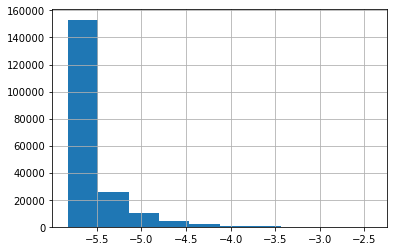

In [4]:
with open('../output/computational_biology-genetics-pagerank.pkl', 'rb') as in_file:
    cb_g_pageranks = pkl.load(in_file)
data_dict = {'doi': [], 'pagerank': []}

for doi, pagerank in cb_g_pageranks.items():
    data_dict['doi'].append(doi)
    data_dict['pagerank'].append(pagerank)

cb_df = pd.DataFrame(data_dict)
print(len(cb_df))

cb_df['log_pagerank'] = np.log10(cb_df['pagerank'])
cb_df['log_pagerank'].hist()
cb_df['log_pagerank'].median()

196506


-5.744532643275968

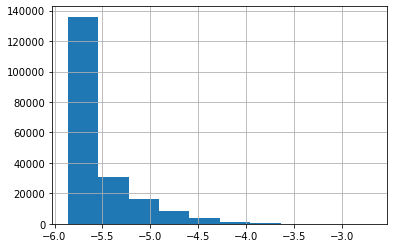

In [5]:
with open('../output/shuffle_results/computational_biology-genetics_42-pagerank.pkl', 'rb') as in_file:
    cb_g_pageranks = pkl.load(in_file)
data_dict = {'doi': [], 'pagerank': []}

for doi, pagerank in cb_g_pageranks.items():
    data_dict['doi'].append(doi)
    data_dict['pagerank'].append(pagerank)

shuffle_df = pd.DataFrame(data_dict)
print(len(shuffle_df))
shuffle_df['log_pagerank'] = np.log10(shuffle_df['pagerank'])
shuffle_df['log_pagerank'].hist()
shuffle_df['log_pagerank'].median()

In [6]:
cb_df.sort_values(by='pagerank', ascending=True)

,doi,pagerank,log_pagerank
196493,10.3390/ijerph19042392,0.000001,-5.827518
152836,10.1186/s12885-019-6479-2,0.000001,-5.827518
110115,10.1159/000458154,0.000001,-5.827518
75909,10.1080/15548627.2018.1525476,0.000001,-5.827518
152830,10.1186/s12885-019-6309-6,0.000001,-5.827518
...,...,...,...
1096,10.1038/nature01511,0.002132,-2.671232
849,10.1093/bioinformatics/btp352,0.002403,-2.619168
6432,10.1146/annurev.genom.9.081307.164359,0.002494,-2.603168
1187,10.1126/science.1058040,0.003566,-2.447844


In [7]:
merged_df = cb_df.merge(shuffle_df, on='doi')
merged_df.rename({'pagerank_x': 'true_pagerank', 'log_pagerank_x': 'log_true_pagerank',
                  'pagerank_y': 'single_shuffle_pagerank', 'log_pagerank_y': 'log_single_shuffle_pagerank'},
                 axis='columns', inplace=True)
merged_df

,doi,true_pagerank,log_true_pagerank,single_shuffle_pagerank,log_single_shuffle_pagerank
0,10.1038/ng0495-347,0.000182,-3.741071,0.000032,-4.499580
1,10.1038/35015718,0.000212,-3.674236,0.000107,-3.971213
2,10.1126/science.274.5287.536,0.000799,-3.097287,0.000056,-4.252081
3,10.3945/ajcn.110.001289,0.000002,-5.779491,0.000002,-5.811821
4,10.1017/s0007114508076253,0.000004,-5.437847,0.000007,-5.139167
...,...,...,...,...,...
196152,10.3390/molecules27041377,0.000001,-5.827518,0.000001,-5.863021
196153,10.1155/2022/6192190,0.000001,-5.827518,0.000001,-5.863021
196154,10.1007/978-1-0716-2071-7_17,0.000001,-5.827518,0.000001,-5.863021
196155,10.2174/1381612822666160907093215,0.000002,-5.814857,0.000001,-5.849553


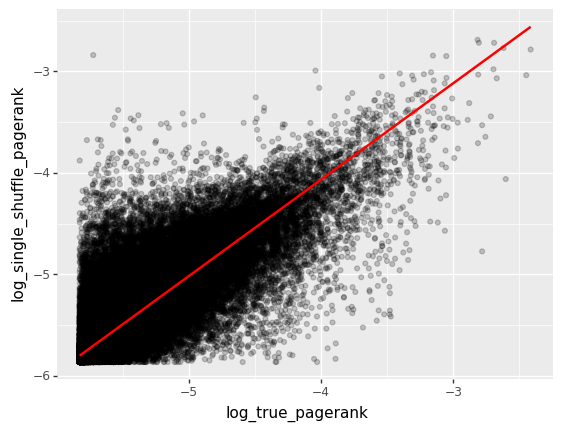

<ggplot: (8762173961463)>

In [8]:
plot = ggplot(merged_df, aes(x='log_true_pagerank', y='log_single_shuffle_pagerank')) 
plot += geom_point(alpha=.2)
plot += geom_smooth(color='red')
plot

In [9]:
data_dict = {'doi': [], 'pagerank': [], 'shuffle': []}
for i in range(100):
    with open(f'../output/shuffle_results/computational_biology-genetics_{i}-pagerank.pkl', 'rb') as in_file:
        pageranks = pkl.load(in_file)

    for doi, pagerank in pageranks.items():
        data_dict['doi'].append(doi)
        data_dict['pagerank'].append(pagerank)
        data_dict['shuffle'].append(i)

shuffle_df = pd.DataFrame(data_dict)

In [10]:
shuffle_df['log_pagerank'] = np.log10(shuffle_df['pagerank'])
shuffle_df.groupby('doi').median()

,pagerank,shuffle,log_pagerank
doi,,,
10.1001/2012.jama.10820,0.000001,49.5,-5.842858
10.1001/amajethics.2018.834,0.000001,49.5,-5.853599
10.1001/amajethics.2018.873,0.000002,49.5,-5.780014
10.1001/archfami.2.11.1158,0.000002,48.5,-5.646393
10.1001/archfami.2.11.1179,0.000003,52.0,-5.510513
...,...,...,...
10.7861/clinmedicine.19-4-273,0.000002,50.5,-5.781626
10.7863/jum.2010.29.6.963,0.000001,49.5,-5.861355
10.7883/yoken.67.62,0.000003,49.5,-5.544320


In [11]:
shuffle_df.groupby('doi').std()

,pagerank,shuffle,log_pagerank
doi,,,
10.1001/2012.jama.10820,8.032796e-09,29.011492,0.002424
10.1001/amajethics.2018.834,7.782757e-09,29.011492,0.002407
10.1001/amajethics.2018.873,2.507701e-07,29.011492,0.043866
10.1001/archfami.2.11.1158,7.600436e-06,29.178400,0.208976
10.1001/archfami.2.11.1179,5.936559e-06,29.016056,0.285694
...,...,...,...
10.7861/clinmedicine.19-4-273,3.220272e-07,29.008036,0.063345
10.7863/jum.2010.29.6.963,7.647806e-09,29.011492,0.002408
10.7883/yoken.67.62,5.201227e-06,29.011492,0.247262


In [12]:
merged_df = cb_df.merge(shuffle_df.groupby('doi').median(), on='doi')
merged_df.rename({'pagerank_x': 'true_pagerank', 'log_pagerank_x': 'log_true_pagerank',
                  'pagerank_y': 'median_shuffle_pagerank', 'log_pagerank_y': 'log_median_shuffle_pagerank'},
                  axis='columns', inplace=True)
merged_df

,doi,true_pagerank,log_true_pagerank,median_shuffle_pagerank,shuffle,log_median_shuffle_pagerank
0,10.1038/ng0495-347,0.000182,-3.741071,0.000029,49.5,-4.537886
1,10.1038/35015718,0.000212,-3.674236,0.000100,49.5,-4.000519
2,10.1126/science.274.5287.536,0.000799,-3.097287,0.000065,49.5,-4.185490
3,10.3945/ajcn.110.001289,0.000002,-5.779491,0.000002,49.5,-5.805412
4,10.1017/s0007114508076253,0.000004,-5.437847,0.000004,49.5,-5.417228
...,...,...,...,...,...,...
196489,10.1155/2022/6192190,0.000001,-5.827518,0.000001,49.5,-5.861355
196490,10.1007/978-1-0716-2071-7_17,0.000001,-5.827518,0.000001,50.0,-5.861306
196491,10.1093/ndt/gfab320,0.000001,-5.827518,0.000001,50.5,-5.861459
196492,10.2174/1381612822666160907093215,0.000002,-5.814857,0.000001,49.5,-5.847742


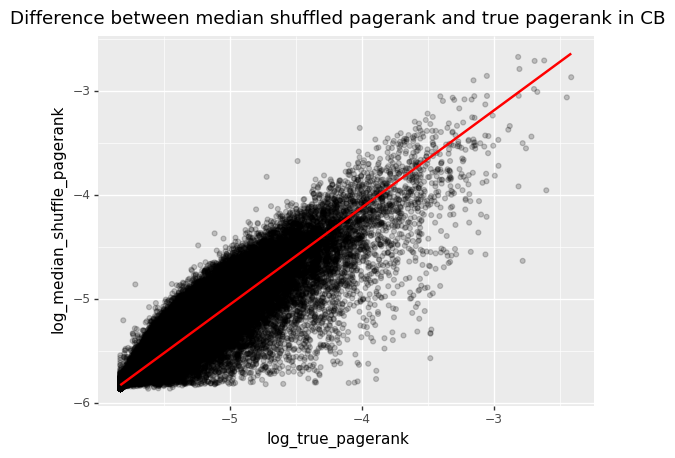

<ggplot: (8762000110421)>

In [15]:
plot = ggplot(merged_df, aes(x='log_true_pagerank', y='log_median_shuffle_pagerank')) 
plot += geom_point(alpha=.2)
plot += geom_smooth(color='red')
plot += ggtitle('Difference between median shuffled pagerank and true pagerank in CB')
plot